In [15]:
"""
The point of this file is to recreate input data that we had in the past
it is a file of shame.
Regardless, we are going to take a trained model, and pass data to it for embeddings
we will then compare the output embeddings with the original embeddings that we still have.

things like plv pct for input, stretch pct for plv weighted loss

1. get model dictionary and initial config
2. adjust config, then save_embeddings into "alternative embeddings file"
3. compare embeddings. radius mean/var. MAE for radius and absolute coords
"""

'\nThe point of this file is to recreate input data that we had in the past\nit is a file of shame.\nRegardless, we are going to take a trained model, and pass data to it for embeddings\nwe will then compare the output embeddings with the original embeddings that we still have.\n\nthings like plv pct for input, stretch pct for plv weighted loss\n\n1. get model dictionary and initial config\n2. adjust config, then save_embeddings into "alternative embeddings file"\n3. compare embeddings. radius mean/var. MAE for radius and absolute coords\n'

In [2]:
import os
import json
import pandas as pd
import numpy as np
from utils.model_analysis_utils import save_embeddings_alternative
from utils.embedding_utils import multiple_embedding_analysis
from utils.stat_utils import run_anova

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [4]:
DATA_ROOT=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\data\MEG'
clinical_file=os.path.join(DATA_ROOT,'MEG.clinical.csv')
clinical_df = pd.read_csv(clinical_file)
template_file = os.path.join(DATA_ROOT,'AALtemplate_balanced.csv')
template_df = pd.read_csv(template_file)
label_options = {'FN':'Functional Net','SOB':'SOB','FN_SOB':'Func Net SOB','All':'All'}
label=label_options['FN']

In [5]:
model_dir=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\study\meg\lp\alpha_plv_54c_dp\4'

In [6]:
config_file=os.path.join(model_dir,'config.json')

In [7]:
with  open(config_file) as f:
    config=json.load(f)

In [8]:
# config
%reload_ext autoreload

In [13]:
model_dir=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\lp\test\all_pats\L3\HGCN_full_findc_id_dp\e100_p6_lr0.021_vpct0.3_tpct0.2_strchinp95_strchloss95_b8_lmse\1'

Namespace(act='selu', adj_threshold=0.329, all_file='C:\\Users\\coleb\\OneDrive\\Desktop\\Fall 2021\\Neuro\\hyperBrain\\data/MEG\\meg_all_MEG_0.329.json', alpha=0.2, band='alpha', batch_size=8, bias=1, c=None, criteria_dict={}, cuda=0, currently_training=False, data_root='C:\\Users\\coleb\\OneDrive\\Desktop\\Fall 2021\\Neuro\\hyperBrain\\data/MEG', dataset='meg', dev_file='C:\\Users\\coleb\\OneDrive\\Desktop\\Fall 2021\\Neuro\\hyperBrain\\data/MEG/meg_valid_MEG_0.329.json', device='cpu', dim=6, distributed_method='None', double_precision=1, dropout=0, edge_type=-1, epochs=100, eval_freq=2, feat_dim=91, fermi_freq=-1, fermi_use=0, frech_B_dict={}, frech_B_list=[], frechet_B=91, gamma=0.9, grad_clip=100, hyp_act=False, idxs_dict={'train': [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 16, 17, 20, 21, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 46, 47, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 66, 67, 68, 69, 72, 73, 80, 81, 82, 83, 84, 85, 90, 91, 98, 99, 108, 109, 114, 115, 122, 123

(180, 90, 90) RIGHTOUT DATA
0.3309338126375074 80
0.32764641825358093 79
0.32456669569015506 78
0.316118533987748 75
0.34999029636383056 85
0.37674931507844195 90
0.4264068635304769 95
dict_keys(['mm_strech', 'ms_norm', 'ms_sigmoid', 'identity', 'add_noise', 'pca_transform']) keys
parsing scans as graphs...
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
936
0.0 ADD NOISEessing: 0
(90, 90) FEATS SHOULD BE HIGH
875
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
629
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
606
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
776
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
798
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
916
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
841
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
958
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
916
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
883
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
978
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
768
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
931
0.0 ADD NO

(90, 90) FEATS SHOULD BE HIGH
1246
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
841
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
748
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
805
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
825
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
859
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
940
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
760
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
778
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
1267
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
1302
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
669
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
859
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
724
0.0 ADD NOISE
(90, 90) FEATS SHOULD BE HIGH
663
test: 100 %      
180 unique ids
180 Final count
train SPLIT
True HAS TRAIN ONLY
0 USES TRAIN ONLY
[12, 13, 14, 15, 20, 21, 28, 29, 32, 33, 40, 41, 42, 43, 44, 45, 46, 47, 56, 57, 58, 59, 60, 61, 68, 69, 74, 75, 76, 77, 78, 79, 84, 85, 88, 89, 94, 95, 98, 99, 100, 101, 102, 103, 108, 109, 1

C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\hyperbolic_learning_master\utils\embed.py:205: RuntimeWarning: Mean of empty slice.
  avg_precision = ((np.arange(1, len(ranks) + 1) / np.sort(ranks)).mean())
C:\Users\coleb\anaconda3\envs\hgcn_test\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\models\base_models.py:541: RuntimeWarning: divide by zero encountered in true_divide
  dist_mat_true_inv=1/np.array(adj_mat_true).squeeze()


12.555632823365785 0.9170537419210645 scores
(91, 3) EMBEDDING SHAPE
(90, 90) dist_mat_true SHAPE
0.875041812470719 0.8465736261040308 correlations


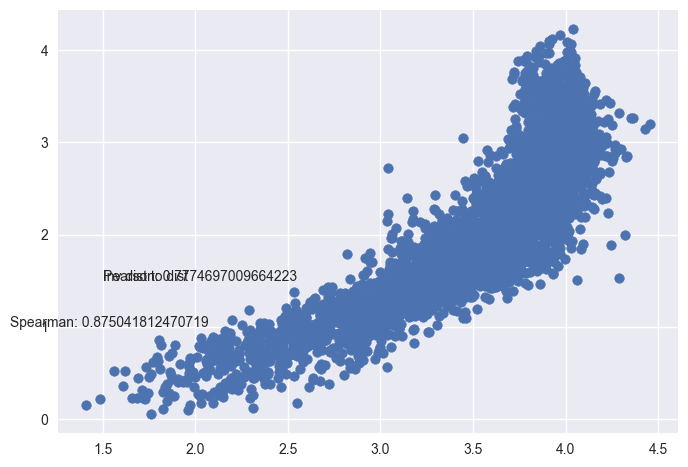

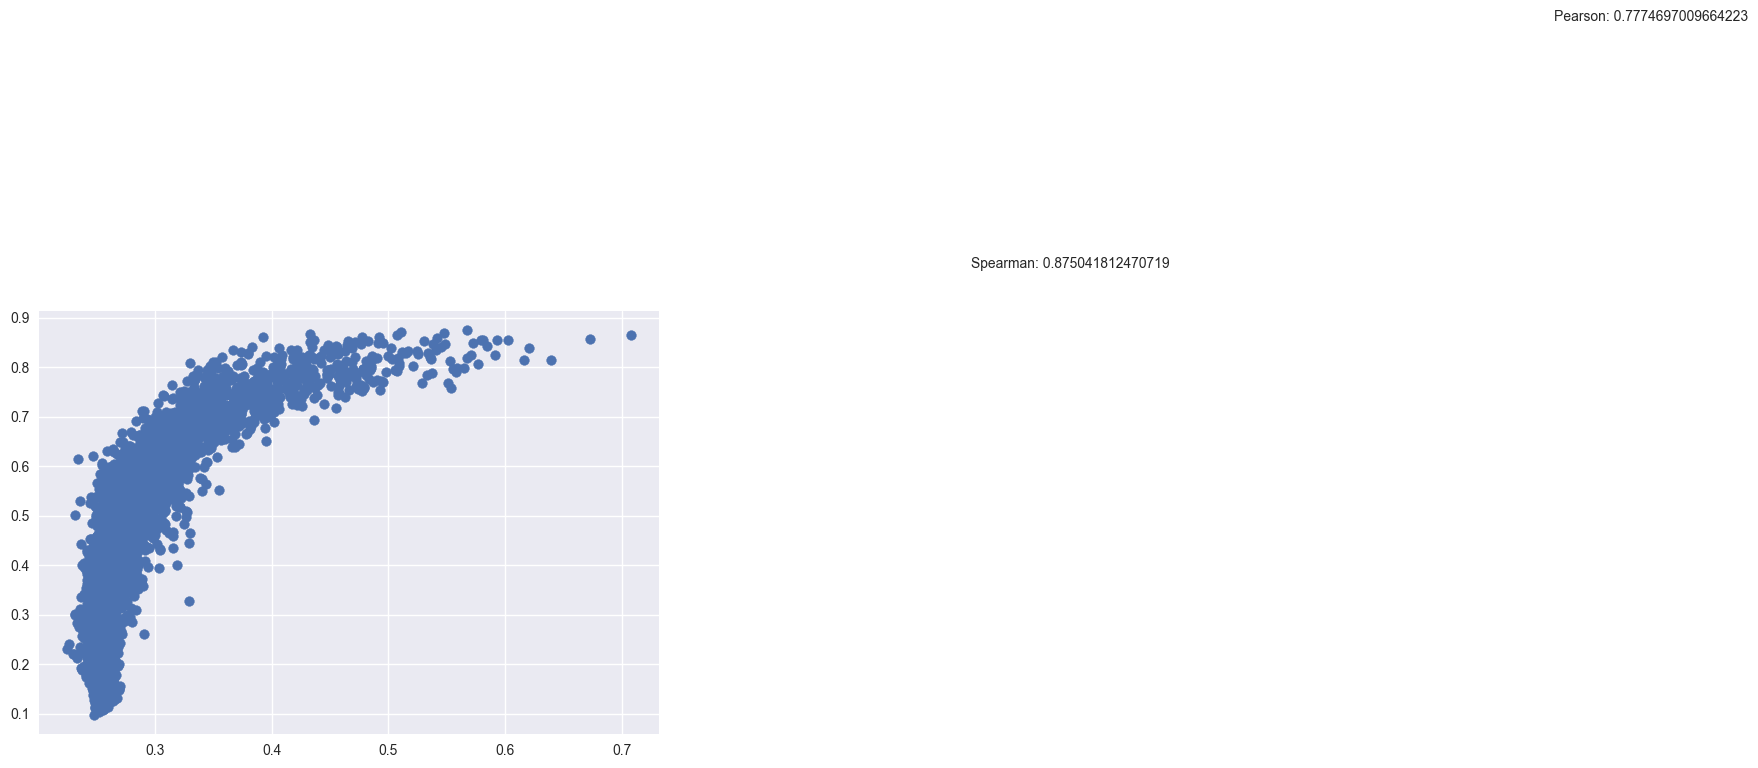

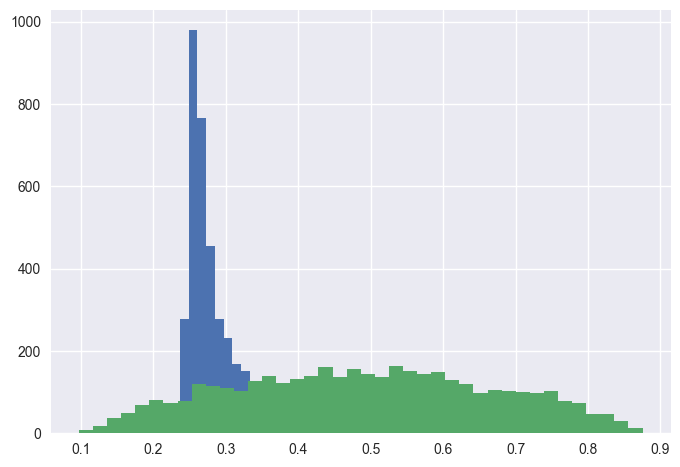

C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\lp\test\all_pats\L3\HGCN_full_findc_id_dp\e100_p6_lr0.021_vpct0.3_tpct0.2_strchinp95_strchloss95_b8_lmse\1\alternative\embeddings\19_embeddings.csv SAVE EMBEDDINGS!
torch.Size([91, 91]) SHAPE!!
torch.Size([1246]) POS SCORES
torch.Size([2759]) POS SCORES
AUTOMATIC CCCCCCCCC
BEWARE
20.085874799357946 0.9327679357809321 scores
(91, 3) EMBEDDING SHAPE
(90, 90) dist_mat_true SHAPE
0.9338349205604503 0.8988942876749587 correlations


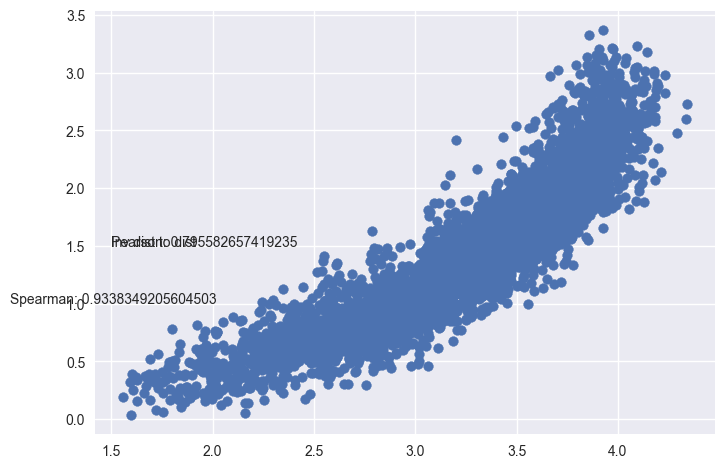

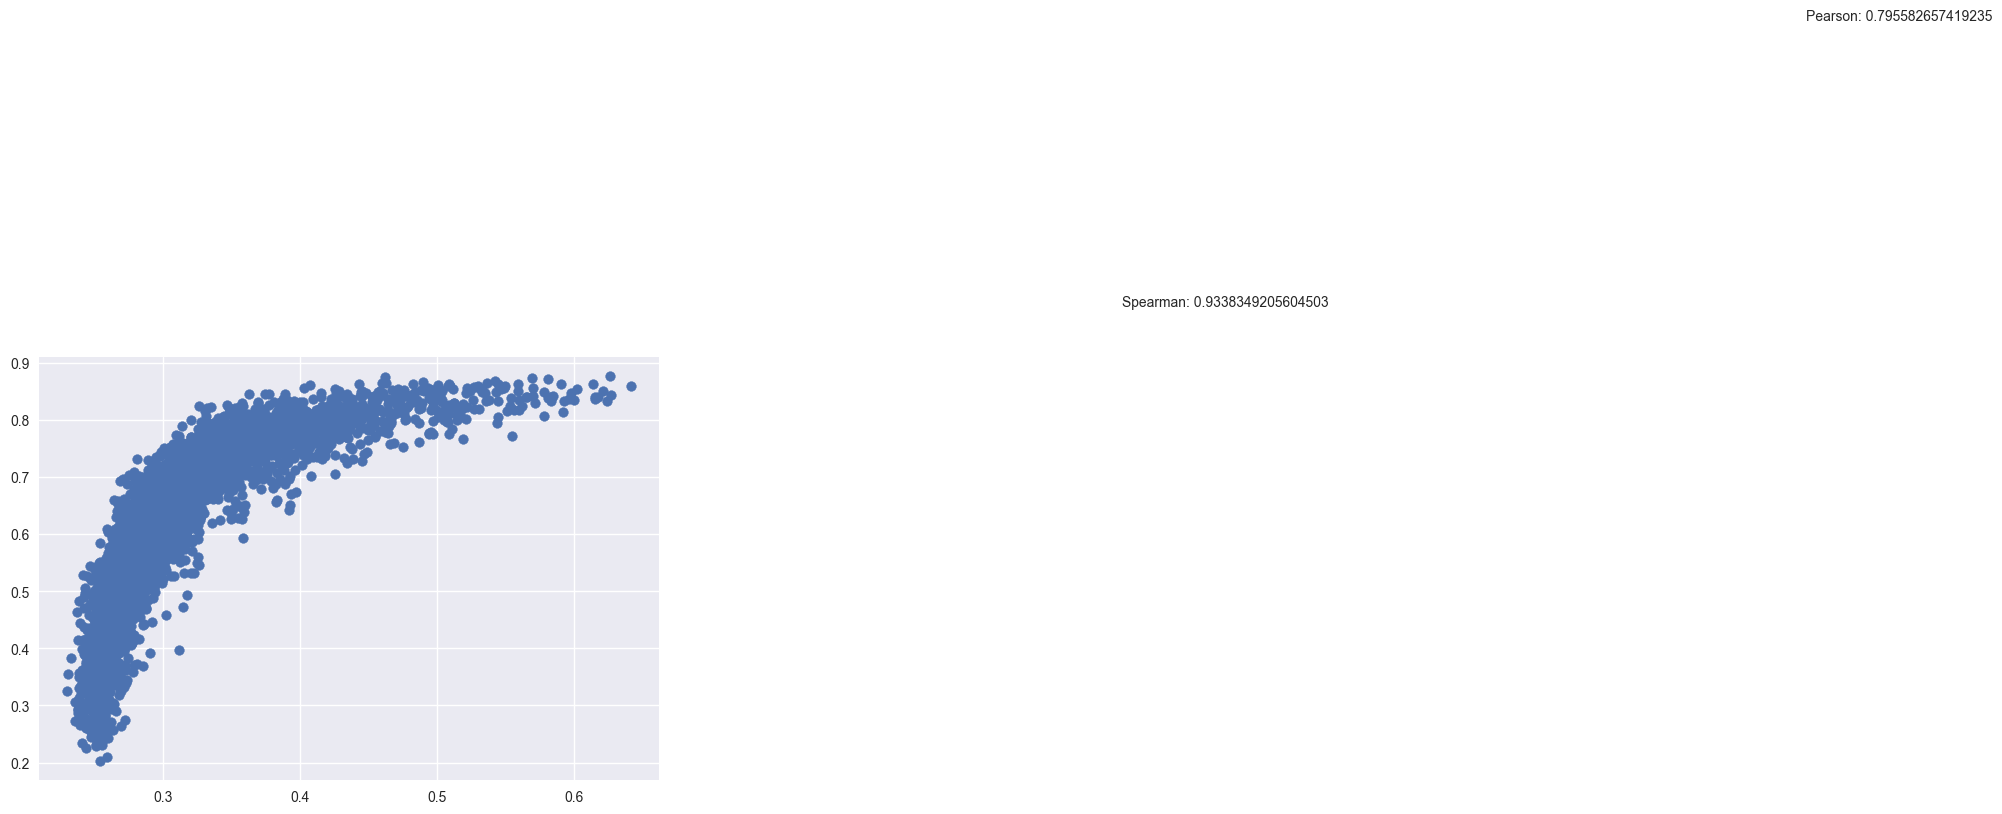

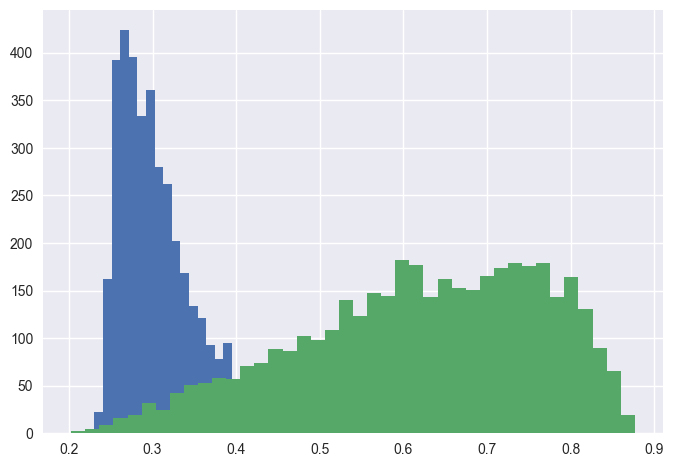

C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\lp\test\all_pats\L3\HGCN_full_findc_id_dp\e100_p6_lr0.021_vpct0.3_tpct0.2_strchinp95_strchloss95_b8_lmse\1\alternative\embeddings\107_embeddings.csv SAVE EMBEDDINGS!
torch.Size([91, 91]) SHAPE!!
torch.Size([841]) POS SCORES
torch.Size([3164]) POS SCORES
AUTOMATIC CCCCCCCCC
BEWARE


C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\hyperbolic_learning_master\utils\embed.py:205: RuntimeWarning: divide by zero encountered in true_divide
  avg_precision = ((np.arange(1, len(ranks) + 1) / np.sort(ranks)).mean())


14.263253012048192 0.9352403706530894 scores
(91, 3) EMBEDDING SHAPE
(90, 90) dist_mat_true SHAPE
0.9377595813115571 0.9073348036497085 correlations


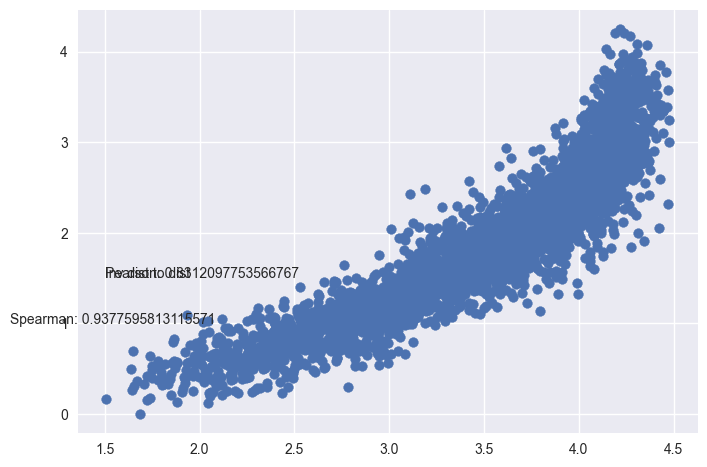

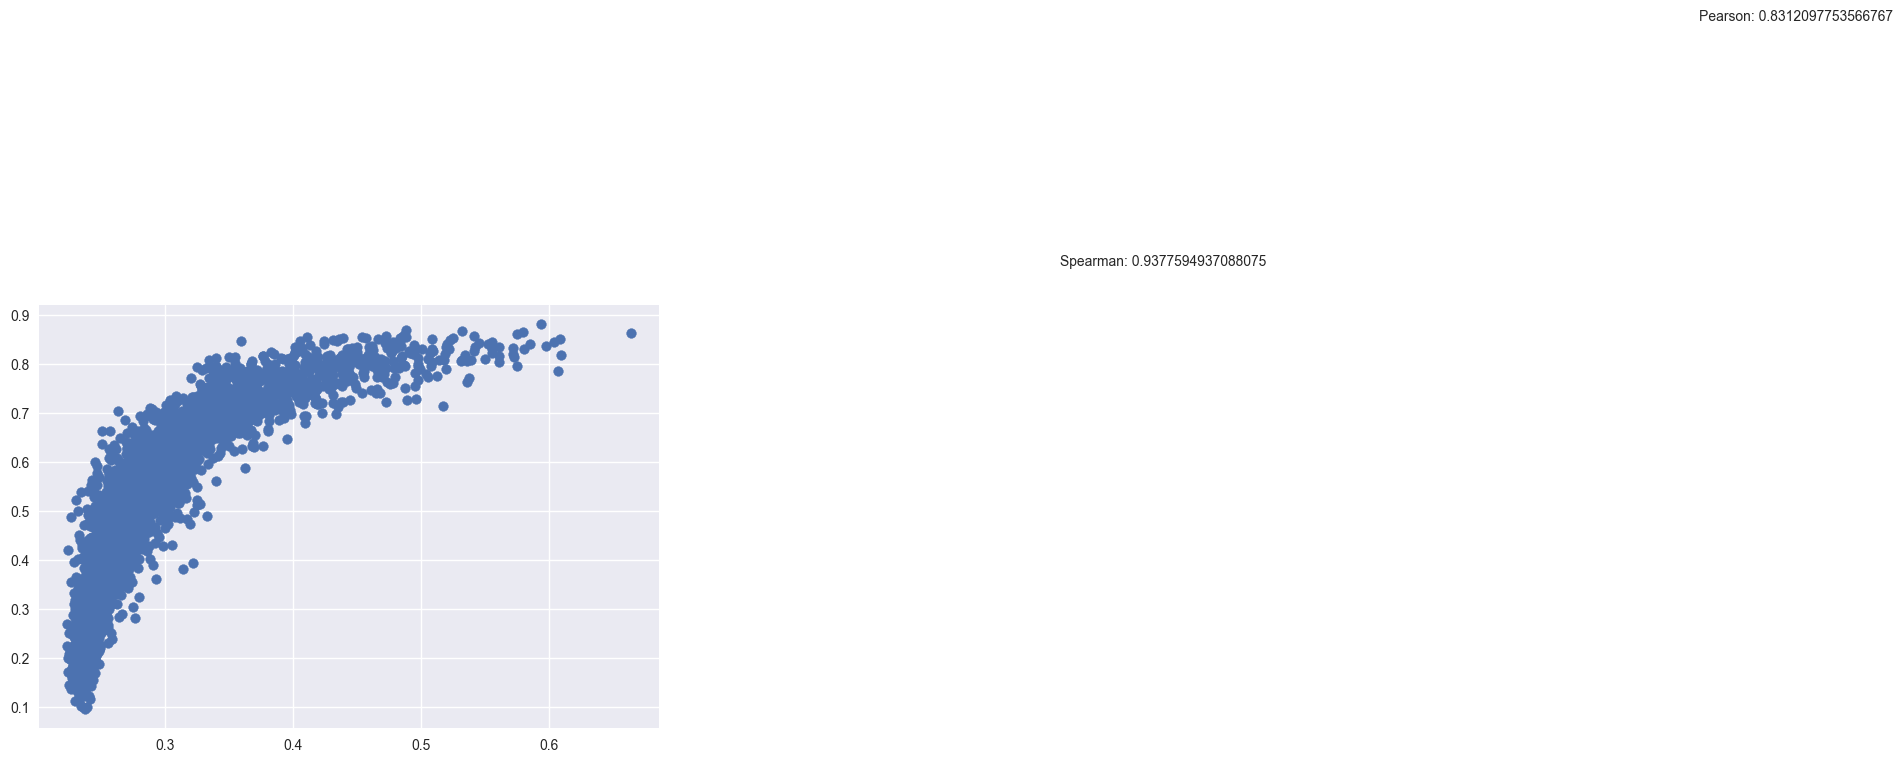

KeyboardInterrupt: 

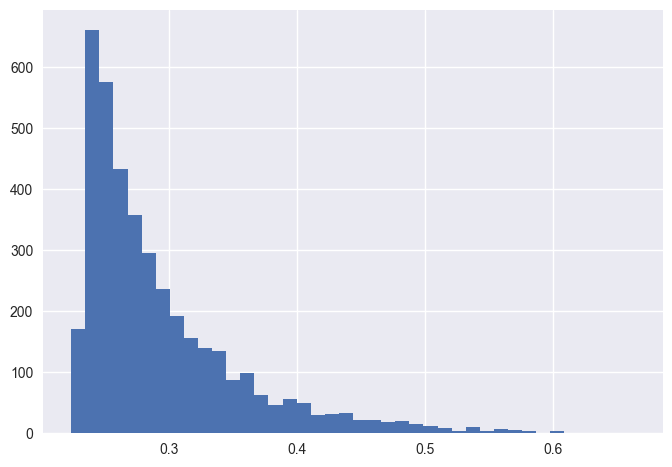

In [35]:
save_embeddings_alternative(model_dir)

In [104]:
def compare_embeddings_np(emb_dir1,emb_dir2):
    print(emb_dir1)
    print(emb_dir2)
    emb_stack1=embeddings_to_np(emb_dir1)
    emb_stack2=embeddings_to_np(emb_dir2)
    
    rad1=np.linalg.norm(emb_stack1,axis=2)
    rad2=np.linalg.norm(emb_stack2,axis=2)
    print(np.mean(rad1),np.mean(rad2),'MEAN RADIUS')
    print(np.std(rad1),np.std(rad2),'STD RADIUS')

    print(np.mean(np.abs(rad1-rad2)),'MEAN ABS RADIUS DIFFERENCE')
    print(np.std(np.abs(rad1-rad2)),'STD ABS RADIUS')

In [105]:
def embeddings_to_np(embedding_dir):

    files=[os.path.join(embedding_dir,f) for f in os.listdir(embedding_dir) if '.csv' in f and len(f.split('_'))==2]
    files.sort()
    dim_order = ['x','y','z','a','b','c','d','e',]
#     stacked_array=
    example=pd.read_csv(files[0])
    dim_cols=[d for d in dim_order if d in example.columns]
    dims=len(dim_cols)
    print(dims,'DIMS')
    stacked_array=np.zeros((len(files),example.shape[0],dims))
    print(stacked_array.shape,'STACKED SHAPE')
    for f in files:
        indx=int(os.path.basename(f).split('_')[0])
#         print(indx)
        emb_df=pd.read_csv(f)
        embs=np.array(emb_df[dim_cols])
        stacked_array[indx]=embs
    rad_array=np.linalg.norm(stacked_array,axis=2)
    return stacked_array
    print(rad_array.shape)
        
    
    
    
    

In [131]:
def run_comparison_and_analysis(model_dir,config_override):
    alt_dir=save_embeddings_alternative(model_dir,config_override)
    base_emb=os.path.join(model_dir,'embeddings')
    alt_emb=os.path.join(alt_dir,'embeddings')
    alt_out=os.path.join(alt_dir,'outputs')
    alt_emb_df=os.path.join(alt_emb,'embedding_stats_Functional Net_PCTt0.29.csv')
    
    compare_embeddings_np(base_emb,alt_emb)
#     assert False
    multiple_embedding_analysis([alt_dir],clinical_df,label,net_threshold=.29,
                                       template_df=template_df,suffix='.csv',model_dir=model_dir,balanced_atl=True,average=False)
    cond_dict={'CogTr':1}
    title=''
    run_anova(alt_emb_df,output_dir=alt_out,label_col='diagnosis',cond_dict=cond_dict)

Namespace(act='selu', adj_threshold=0.329, all_file='/content/gdrive/MyDrive/Thesis/hgcn/data/MEG/meg_all_MEG_0.329.json', alpha=0.2, band='alpha', batch_size=8, bias=1, c=0.54, cuda=0, currently_training=False, data_root='/content/gdrive/MyDrive/Thesis/hgcn/data/MEG', dataset='meg', dev_file='/content/gdrive/MyDrive/Thesis/hgcn/data/MEG/meg_valid_MEG_0.329.json', device='cpu', dim=6, distributed_method='None', double_precision=1, dropout=0, edge_type=-1, epochs=100, eval_freq=3, feat_dim=91, fermi_freq=-1, fermi_use=0, frech_B_dict={}, frech_B_list=[], frechet_B=91, gamma=0.9, grad_clip=100, idxs_dict={'train': [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 56, 57, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 11

C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\utils\stat_utils.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_df[metric_col]=val_col
C:\Users\coleb\anaconda3\envs\hgnn\lib\site-packages\pingouin\parametric.py:1486: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  data = data_piv.melt(ignore_index=False, value_name=dv).reset_index()
C:\Users\coleb\anaconda3\envs\hgnn\lib\site-packages\pingouin\parametric.py:538: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the fu

    index       Source        SS  DF1  DF2        MS         F     p-unc  \
0       0        label  0.020507    1   44  0.020507  0.790831  0.378685   
1       1  time_labels  0.002309    1   44  0.002309  0.192801  0.662744   
2       2  Interaction  0.000891    1   44  0.000891  0.074373  0.786349   
3       0        label  0.099637    1   44  0.099637  1.095540  0.300963   
4       1  time_labels  0.000951    1   44  0.000951  0.033210  0.856234   
5       2  Interaction  0.027693    1   44  0.027693  0.967261  0.330741   
6       0        label  0.569999    1   44  0.569999  9.632569  0.003336   
7       1  time_labels  0.015455    1   44  0.015455  1.057172  0.309480   
8       2  Interaction  0.038123    1   44  0.038123  2.607794  0.113489   
9       0        label  0.175927    1   44  0.175927  8.523285  0.005509   
10      1  time_labels  0.001460    1   44  0.001460  0.270398  0.605671   
11      2  Interaction  0.000061    1   44  0.000061  0.011334  0.915701   
12      0   

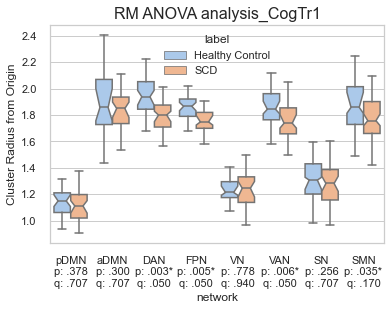

In [137]:
config_override={'stretch_pct':95,
                'stretch_loss':95}
run_comparison_and_analysis(model_dir,config_override)

In [110]:
# emb1=os.path.join(model_dir,'embeddings')
# emb2=os.path.join(model_dir,'alternative','_stretch_pct98_stretch_loss95','embeddings')
# compare_embeddings_np(emb1,emb2)


# emb1=os.path.join(model_dir,'embeddings')
# emb2=os.path.join(model_dir,'alternative','_stretch_pct95_stretch_loss95','embeddings')
# compare_embeddings_np(emb1,emb2)

C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\study\meg\lp\alpha_plv_54c_dp\4\embeddings
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\study\meg\lp\alpha_plv_54c_dp\4\alternative\_stretch_pct98_stretch_loss95\embeddings
3 DIMS
(180, 90, 3) STACKED SHAPE
3 DIMS
(180, 90, 3) STACKED SHAPE
0.6720425629879077 0.6651570619757388 MEAN RADIUS
0.18293778521912107 0.18364876312977385 STD RADIUS
0.008825569008369734 MEAN ABS RADIUS DIFFERENCE
0.005769490256481543 STD ABS RADIUS
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\study\meg\lp\alpha_plv_54c_dp\4\embeddings
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\study\meg\lp\alpha_plv_54c_dp\4\alternative\_stretch_pct95_stretch_loss95\embeddings
3 DIMS
(180, 90, 3) STACKED SHAPE
3 DIMS
(180, 90, 3) STACKED SHAPE
0.6720425629879077 0.6720425630385034 MEAN RADIUS
0.18293778521912107 0.18293778523403947 STD RADIUS
1.752492308819666e-09 MEAN ABS RADIUS DIFFERENCE
1.4160758532138143e-09 STD ABS RADIUS


In [ ]:
# for c in configs_combo:
#     save_embeddings_alternative(model_dir,config_override)
# for c in configs_combo:
#     #calculate embedding_name
#     alt_emb_dir
#     compare_embeddings_np(base_emb_dir,alt_emb_dir):
clinical_df=
embedding_roots=[files]
c